# Mushroom Binary Classification With ANN

In this project I will apply the artificial neural network model to the Mushroom Dataset from Kaggle https://www.kaggle.com/datasets/uciml/mushroom-classification. 

This project was done for training purposes only. I wanted to see how different hyperparameters can affect a model, and to practice to build Sequntial models using Tensorflow.Keras.

### The problem statement: 
> to identify whether each species is poisonous or not.

### The goal of this project:
 * practice building artifical neural networks with Keras;
 * compare models with different parameters.



# Steps:

   * **Data preprocessing**
   * **Comparing different models**
   * **Choosing the final model**
   * **Making predictions**
   * **Plotting confusion matrix**

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Load the data + short review

In [3]:
file_path = '/Users/elizaveta/Programming/datasets/mushrooms.csv'
df = pd.read_csv(file_path)

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

### Encode the data

In [7]:
df = pd.get_dummies(df)

df.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Define target and independent variables

In [8]:
y = np.array(df.class_p)

target_variables = ['class_e', 'class_p']
X = np.array(df.drop(df[target_variables], axis=1))

X.shape

(8124, 117)

In [9]:
y = y.reshape(-1, 1)

print(y)
print(y.shape)

[[1]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]
(8124, 1)


### Split the data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (6093, 117)
X_test shape: (2031, 117)
y_train shape: (6093, 1)
y_test shape: (2031, 1)


In [11]:
print(X_train[0].shape)

(117,)


## Comparing different Sequential models

# 1

Here I will build a Sequential model with:
- Adam optimizer (learning rate = 0.0001)
- Batch size: 10
- Epochs: 10

In [12]:
model1 = Sequential([
    Dense(units=16, activation='relu', input_shape=(117,)),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model1.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model1.fit(x=X_train, y=y_train, batch_size=10, epochs=10, validation_split=0.2, verbose=2)

2022-09-19 16:36:55.879732: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
488/488 - 2s - loss: 0.5776 - accuracy: 0.7899 - val_loss: 0.4143 - val_accuracy: 0.8983 - 2s/epoch - 4ms/step
Epoch 2/10
488/488 - 1s - loss: 0.2962 - accuracy: 0.9120 - val_loss: 0.2092 - val_accuracy: 0.9336 - 767ms/epoch - 2ms/step
Epoch 3/10
488/488 - 1s - loss: 0.1599 - accuracy: 0.9473 - val_loss: 0.1187 - val_accuracy: 0.9631 - 719ms/epoch - 1ms/step
Epoch 4/10
488/488 - 1s - loss: 0.0920 - accuracy: 0.9762 - val_loss: 0.0705 - val_accuracy: 0.9787 - 659ms/epoch - 1ms/step
Epoch 5/10
488/488 - 1s - loss: 0.0550 - accuracy: 0.9858 - val_loss: 0.0444 - val_accuracy: 0.9893 - 635ms/epoch - 1ms/step
Epoch 6/10
488/488 - 1s - loss: 0.0346 - accuracy: 0.9943 - val_loss: 0.0296 - val_accuracy: 0.9951 - 646ms/epoch - 1ms/step
Epoch 7/10
488/488 - 1s - loss: 0.0229 - accuracy: 0.9984 - val_loss: 0.0201 - val_accuracy: 0.9984 - 629ms/epoch - 1ms/step
Epoch 8/10
488/488 - 1s - loss: 0.0157 - accuracy: 0.9994 - val_loss: 0.0144 - val_accuracy: 0.9984 - 659ms/epoch - 1ms/step
Epo

Minimum validation loss: 0.007917284034192562 

Maximum validation accuracy: 0.9991796612739563 

Parameters 
 learning_rate 0.0001 
 loss 'binary_crossentropy' 
 batch_size 10 
 epochs 10 
 validation_split 0.2  


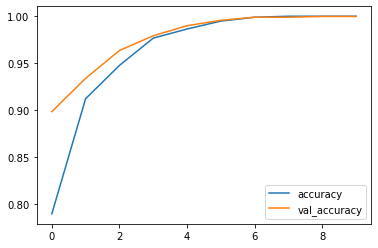

In [13]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
print("Minimum validation loss: {} \n".format(history_df['val_loss'].min()))
print("Maximum validation accuracy: {} \n".format(history_df['val_accuracy'].max()))
print('Parameters \n learning_rate 0.0001 \n loss \'binary_crossentropy\' \n batch_size 10 \n epochs 10 \n validation_split 0.2  ')

# 2

Here I will build a Sequential model with:
- Adam optimizer (learning rate = 0.001)
- Batch size: 10
- Epochs: 10

Eventually, I've just changen learning rate from 0.0001 to 0.001

In [28]:
model2 = Sequential([
    Dense(units=16, activation='relu', input_shape=(117,)),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model2.compile(optimizer=Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model2.fit(x=X_train, y=y_train, batch_size=10, epochs=10, validation_split=0.2, verbose=2)

Epoch 1/10
488/488 - 1s - loss: 0.1361 - accuracy: 0.9584 - val_loss: 0.0172 - val_accuracy: 0.9951 - 1s/epoch - 3ms/step
Epoch 2/10
488/488 - 1s - loss: 0.0065 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9992 - 778ms/epoch - 2ms/step
Epoch 3/10
488/488 - 1s - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0015 - val_accuracy: 1.0000 - 791ms/epoch - 2ms/step
Epoch 4/10
488/488 - 1s - loss: 7.1476e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000 - 752ms/epoch - 2ms/step
Epoch 5/10
488/488 - 1s - loss: 3.9946e-04 - accuracy: 1.0000 - val_loss: 3.7065e-04 - val_accuracy: 1.0000 - 721ms/epoch - 1ms/step
Epoch 6/10
488/488 - 1s - loss: 1.9267e-04 - accuracy: 1.0000 - val_loss: 2.4723e-04 - val_accuracy: 1.0000 - 860ms/epoch - 2ms/step
Epoch 7/10
488/488 - 1s - loss: 1.1828e-04 - accuracy: 1.0000 - val_loss: 1.6848e-04 - val_accuracy: 1.0000 - 813ms/epoch - 2ms/step
Epoch 8/10
488/488 - 1s - loss: 7.9866e-05 - accuracy: 1.0000 - val_loss: 1.2697e-04 - val_accuracy:

Minimum validation loss: 6.819538248237222e-05 

Maximum validation accuracy: 1.0 

Parameters 
 learning_rate 0.001 
 loss 'binary_crossentropy' 
 batch_size 10 
 epochs 10 
 validation_split 0.2  


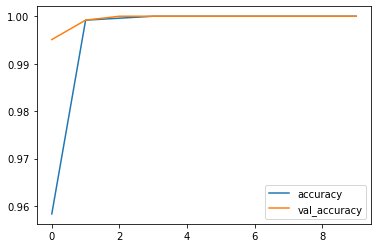

In [29]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
print("Minimum validation loss: {} \n".format(history_df['val_loss'].min()))
print("Maximum validation accuracy: {} \n".format(history_df['val_accuracy'].max()))
print('Parameters \n learning_rate 0.001 \n loss \'binary_crossentropy\' \n batch_size 10 \n epochs 10 \n validation_split 0.2  ')

# 3

Here I will build a Sequential model with:
- Adam optimizer (learning rate = 0.001)
- Batch size: 256
- Epochs: 10

In [30]:
model3 = Sequential([
    Dense(units=16, activation='relu', input_shape=(117,)),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model3.compile(optimizer=Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model3.fit(x=X_train, y=y_train, batch_size=256, epochs=10, validation_split=0.2, verbose=2)

Epoch 1/10
20/20 - 0s - loss: 0.5886 - accuracy: 0.7913 - val_loss: 0.4851 - val_accuracy: 0.9180 - 493ms/epoch - 25ms/step
Epoch 2/10
20/20 - 0s - loss: 0.4075 - accuracy: 0.9146 - val_loss: 0.3198 - val_accuracy: 0.9221 - 54ms/epoch - 3ms/step
Epoch 3/10
20/20 - 0s - loss: 0.2646 - accuracy: 0.9249 - val_loss: 0.2036 - val_accuracy: 0.9360 - 55ms/epoch - 3ms/step
Epoch 4/10
20/20 - 0s - loss: 0.1684 - accuracy: 0.9522 - val_loss: 0.1285 - val_accuracy: 0.9647 - 70ms/epoch - 4ms/step
Epoch 5/10
20/20 - 0s - loss: 0.1083 - accuracy: 0.9737 - val_loss: 0.0852 - val_accuracy: 0.9770 - 81ms/epoch - 4ms/step
Epoch 6/10
20/20 - 0s - loss: 0.0711 - accuracy: 0.9869 - val_loss: 0.0589 - val_accuracy: 0.9902 - 75ms/epoch - 4ms/step
Epoch 7/10
20/20 - 0s - loss: 0.0484 - accuracy: 0.9926 - val_loss: 0.0418 - val_accuracy: 0.9918 - 85ms/epoch - 4ms/step
Epoch 8/10
20/20 - 0s - loss: 0.0334 - accuracy: 0.9961 - val_loss: 0.0300 - val_accuracy: 0.9975 - 56ms/epoch - 3ms/step
Epoch 9/10
20/20 - 0s 

Minimum validation loss: 0.01741490513086319 

Maximum validation accuracy: 0.9975389838218689 

Parameters 
 learning_rate 0.001 
 loss 'binary_crossentropy' 
 batch_size 256 
 epochs 10 
 validation_split 0.2  


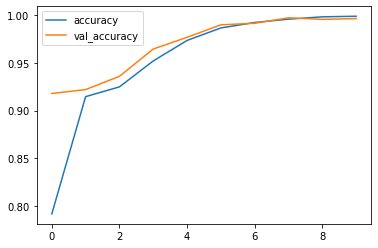

In [31]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
print("Minimum validation loss: {} \n".format(history_df['val_loss'].min()))
print("Maximum validation accuracy: {} \n".format(history_df['val_accuracy'].max()))
print('Parameters \n learning_rate 0.001 \n loss \'binary_crossentropy\' \n batch_size 256 \n epochs 10 \n validation_split 0.2  ')

# 4

Here I will build a Sequential model with:
- Adam optimizer (learning rate = 0.001)
- Batch size: 10
- Epochs: 50

Trying to fit the model with more epochs...

In [14]:
model4 = Sequential([
    Dense(units=16, activation='relu', input_shape=(117,)),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model4.compile(optimizer=Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model4.fit(x=X_train, y=y_train, batch_size=10, epochs=50, validation_split=0.2, verbose=2)

Epoch 1/50
488/488 - 1s - loss: 0.1147 - accuracy: 0.9725 - val_loss: 0.0124 - val_accuracy: 0.9967 - 1s/epoch - 3ms/step
Epoch 2/50
488/488 - 1s - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0030 - val_accuracy: 1.0000 - 786ms/epoch - 2ms/step
Epoch 3/50
488/488 - 1s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000 - 682ms/epoch - 1ms/step
Epoch 4/50
488/488 - 1s - loss: 5.3322e-04 - accuracy: 1.0000 - val_loss: 5.1867e-04 - val_accuracy: 1.0000 - 653ms/epoch - 1ms/step
Epoch 5/50
488/488 - 1s - loss: 2.9097e-04 - accuracy: 1.0000 - val_loss: 3.1774e-04 - val_accuracy: 1.0000 - 635ms/epoch - 1ms/step
Epoch 6/50
488/488 - 1s - loss: 1.6319e-04 - accuracy: 1.0000 - val_loss: 2.1634e-04 - val_accuracy: 1.0000 - 637ms/epoch - 1ms/step
Epoch 7/50
488/488 - 1s - loss: 1.0502e-04 - accuracy: 1.0000 - val_loss: 1.4326e-04 - val_accuracy: 1.0000 - 631ms/epoch - 1ms/step
Epoch 8/50
488/488 - 1s - loss: 6.2291e-05 - accuracy: 1.0000 - val_loss: 1.2231e-04 - val_accur

Minimum validation loss: 4.370489303795466e-09 

Maximum validation accuracy: 1.0 

Parameters 
 learning_rate 0.001 
 loss 'binary_crossentropy' 
 batch_size 10 
 epochs 50 
 validation_split 0.2  


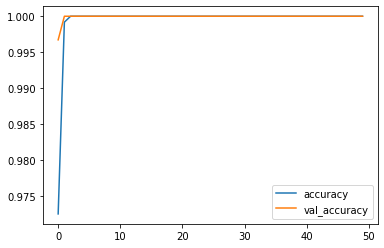

In [15]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
print("Minimum validation loss: {} \n".format(history_df['val_loss'].min()))
print("Maximum validation accuracy: {} \n".format(history_df['val_accuracy'].max()))
print('Parameters \n learning_rate 0.001 \n loss \'binary_crossentropy\' \n batch_size 10 \n epochs 50 \n validation_split 0.2  ')

# 5

Here I use a Sequential model with more neurons in each hidden layer (512). 

In [34]:
model5 = Sequential([
    Dense(units=512, activation='relu', input_shape=(117,)),
    Dense(units=512, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model5.compile(optimizer=Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model5.fit(x=X_train, y=y_train, batch_size=10, epochs=10, validation_split=0.2, verbose=2)

Epoch 1/10
488/488 - 2s - loss: 0.0250 - accuracy: 0.9904 - val_loss: 1.4604e-04 - val_accuracy: 1.0000 - 2s/epoch - 3ms/step
Epoch 2/10
488/488 - 1s - loss: 5.5591e-05 - accuracy: 1.0000 - val_loss: 3.7518e-05 - val_accuracy: 1.0000 - 1s/epoch - 2ms/step
Epoch 3/10
488/488 - 1s - loss: 1.3919e-05 - accuracy: 1.0000 - val_loss: 1.3384e-05 - val_accuracy: 1.0000 - 1s/epoch - 2ms/step
Epoch 4/10
488/488 - 1s - loss: 5.3625e-06 - accuracy: 1.0000 - val_loss: 1.0189e-05 - val_accuracy: 1.0000 - 1s/epoch - 2ms/step
Epoch 5/10
488/488 - 1s - loss: 2.7660e-06 - accuracy: 1.0000 - val_loss: 3.3665e-06 - val_accuracy: 1.0000 - 1s/epoch - 2ms/step
Epoch 6/10
488/488 - 1s - loss: 1.4326e-06 - accuracy: 1.0000 - val_loss: 2.2711e-06 - val_accuracy: 1.0000 - 1s/epoch - 2ms/step
Epoch 7/10
488/488 - 2s - loss: 8.8644e-07 - accuracy: 1.0000 - val_loss: 1.5124e-06 - val_accuracy: 1.0000 - 2s/epoch - 3ms/step
Epoch 8/10
488/488 - 1s - loss: 5.7693e-07 - accuracy: 1.0000 - val_loss: 1.0416e-06 - val_acc

Minimum validation loss: 5.337249149306444e-07 

Maximum validation accuracy: 1.0 

Parameters 
 learning_rate 0.001 
 loss 'binary_crossentropy' 
 batch_size 10 
 epochs 10 
 validation_split 0.2  


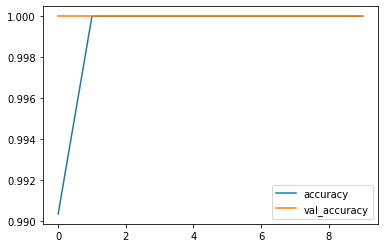

In [35]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
print("Minimum validation loss: {} \n".format(history_df['val_loss'].min()))
print("Maximum validation accuracy: {} \n".format(history_df['val_accuracy'].max()))
print('Parameters \n learning_rate 0.001 \n loss \'binary_crossentropy\' \n batch_size 10 \n epochs 10 \n validation_split 0.2  ')

## Choose the best model

Most of the models did well with the training and validation datasets. 
In the end, I can conclude that the second and fourth models are the best for this task. The second model produces slightly more errors, but it is slightly faster. The fourth model produces slightly fewer errors, but it is slightly slower. 
The models are not very different from each other, so I will use the fourth model. 

## Make predictions

In [17]:
predictions = model4.predict(x=X_test, batch_size=10, verbose=0)
predictions = np.round(predictions)

print(predictions[:5])

[[0.]
 [1.]
 [1.]
 [0.]
 [1.]]


## Confusion matrix

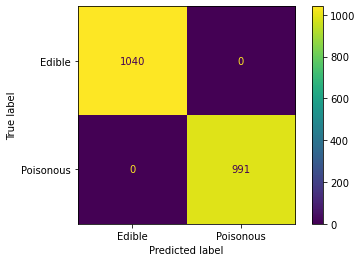

In [17]:
display_labels=['Edible', 'Poisonous']

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

disp.plot()